# Inverse Problems Exercises: 2022s s02 (non-sc)
https://www.umm.uni-heidelberg.de/miism/

## Notes
* Please **DO NOT** change the name of the `.ipynb` file. 
* Please **DO NOT** import extra packages to solve the tasks. 
* Please put the `.ipynb` file directly into the `.zip` archive without any intermediate folder. 

## Please provide your personal information
* full name (Name): Maximilian Richter

YOUR ANSWER HERE

## I06: Convolution theorem

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg import toeplitz

In [2]:
from urllib.request import urlopen
import matplotlib.image as mpimg

# create a file-like object from the url
file_input = urlopen('https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Grayscale_Cat.jpg/320px-Grayscale_Cat.jpg')

# load the input image
image_input = mpimg.imread(file_input, 'jpg')

# pick the central line as signal f
f_true = image_input[image_input.shape[0] // 2, :]

### Imaging model
The imaging model can be represented by
$$
g = h \otimes f_\text{true} = Af_\text{true} = \mathcal{F}^{-1}\{ \mathcal{F}\{h\} \mathcal{F}\{f_\text{true}\} \} .
$$
* $f_\text{true}$ is the input signal
* $h$ is the point spread function (kernel)
* $\otimes$ is the convolution operator
* $A$ is the Toeplitz matrix of $h$
* $\mathcal{F}$ and $\mathcal{F}^{-1}$ are the Fourier transform operator and inverse Fourier transform operator
* $g$ is the output signal

### Gaussian kernel
Implement the Gaussian kernel function $h$
* Given the standard deviation of the kernel $\sigma_h$
* Given the kernel size $s_h$
* Define the origin of the kernels in the middle of the array
* Normalize the kernel
* Implement the function `get_gaussian_1d()` (using `numpy.array`)
  
Generate the Gaussian kernels
* Parameter options of $(\sigma_h, s_h)$
  - (1, 5)
  - (4, 21)
  - (7, 35)
  - (12, 65)
* Save the outputs in the variable `list_h_psf` (as `list` of `numpy.array`)

Display the result
* Plot the kernels in `list_h_psf` in the same order of the parameter options in the axes `ax`
* Show the legend in the axes `ax`

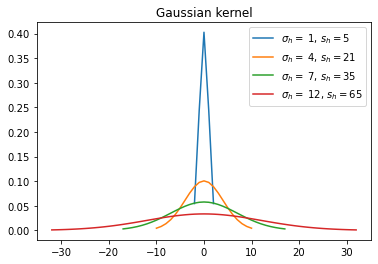

In [3]:
def get_gaussian_1d(sigma, kernel_size):
    """ Returns a gaussian kernel, with a specified kernel size.
    Low pass (blurring) kernel.

    :param sigma: Standard deviation of the Gaussian function.
    :param kernel_size: Kernel size.
    :returns: normalized Gaussian kernel.
    """
    support = np.arange(-np.floor(kernel_size/2), np.ceil(kernel_size/2))
    values = 1/np.sqrt(2*np.pi)*sigma*np.exp(-support**2/(2*sigma**2))
    return values/np.sum(values)

fig, ax = plt.subplots()  # Create a figure and an axes.
ax.set_title('Gaussian kernel')

list_params = [(1, 5), (4, 21), (7,35), (12, 65)]
list_h_psf = [get_gaussian_1d(sigma, kernel_size) for (sigma, kernel_size) in list_params]

for psf, (sigma, kernel_size) in zip(list_h_psf, list_params):
    ax.plot(np.arange(-np.floor(kernel_size/2), np.ceil(kernel_size/2)), psf, label="$\sigma_h =$ {}, $s_h =${}".format(sigma, kernel_size))
ax.legend()

In [ ]:
# This cell contains hidden tests.


In [ ]:
# This cell contains hidden tests.


### Convolution operation
Convolution with the Gaussian kernels $g = h \otimes f_\text{true}$ (using `numpy.convolve()`)
* Apply the kernels in `list_h_psf` to `f_true`
* Return the outputs with the same length as `f_true`
* Save the outputs in the variable `list_g_cov` (as `list` of `numpy.array`)

Display the result
* Plot the outputs in `list_g_cov` in the same order of the parameter options in the axes `ax`
* Plot `f_true` in the axes `ax`
* Show the legend in the axes `ax`

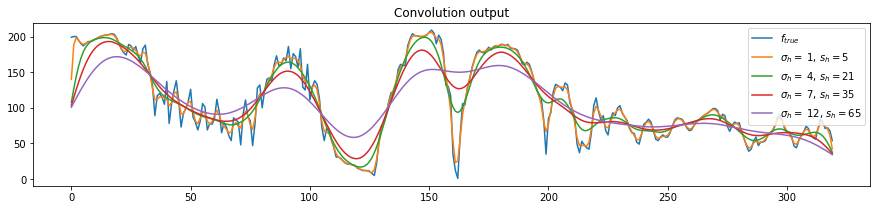

In [4]:
fig, ax = plt.subplots(1, 1, figsize = (15, 3))  # Create a figure and an axes.
ax.set_title('Convolution output')

list_g_cov = [np.convolve(psf, f_true, mode="same") for psf in list_h_psf]

ax.plot(f_true, label="$f_{true}$")
for g_cov, (sigma, kernel_size) in zip(list_g_cov, list_params):
    ax.plot(g_cov, label="$\sigma_h =$ {}, $s_h =${}".format(sigma, kernel_size))
ax.legend()

In [5]:
# This cell contains hidden tests.


### Toeplitz matrix 
Implement the Toeplitz matrix $A$ corresponding to $h$ (using `scipy.linalg.toeplitz()` optionally)
  - Given $h$
  - Given signal size $s_f$
  - Implement the function `get_convolution_matrix()` (using `numpy.array`)
  
Generate the Toeplitz matrices
* Return the outputs of each kernel in `list_h_psf` for `f_true`
* Save the outputs in the variable `list_A_psf` (as `list` of `numpy.array`)

Display the result
* Plot the matrices in `list_A_psf` as grayscale images in the same order of the parameter options in the subplots of `axs`
* Add proper titles to the subplots of `axs`

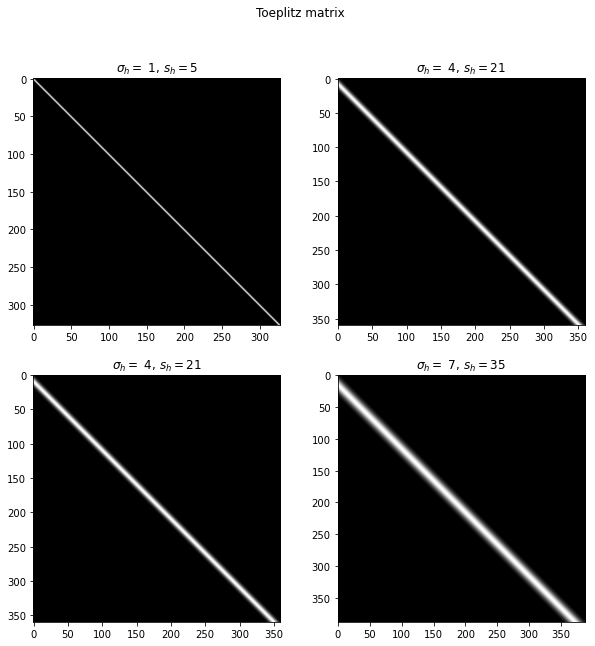

In [6]:
def get_convolution_matrix(kernel, n):
    """ Create a Toeplitz matrix for discrete 1d convolution.

    :param kernel: 1d convolution kernel.
    :param n: Size of the signal, which should be convolved with the kernel.
    :returns: 2d matrix of size (n,n) for convolution by matrix-vector multiplication.
    """
    result = np.zeros((n,n))
    m = kernel.shape[0]
    for i in range(n):
        if i<n-m:
            result[i:i+m,i] = kernel
        else:
            for j in range(m):
                result[i+j:i+m,i+j] = kernel[:m-j]
            break
    return result

list_A_psf = [get_convolution_matrix(psf , f_true.shape[0]+(psf.shape[0]-1)*2) for psf in list_h_psf]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Toeplitz matrix')

for i in range(2):
    for j in range(2):
        sigma, kernel_size = list_params[i+j]
        axs[i,j].imshow(list_A_psf[i+j], cmap="gray")
        axs[i,j].set_title("$\sigma_h =$ {}, $s_h =${}".format(sigma, kernel_size))


In [7]:
# This cell contains hidden tests.


In [8]:
# This cell contains hidden tests.


### Convolution with the Toeplitz matrix 
Convolution with the Toeplitz matrix $g = Af_\text{true}$
* Apply the Toeplitz matrix in `list_A_psf` to `f_true`
* Save the outputs in the variable `list_g_toe` (as `list` of `numpy.array`)

Display the result
* Plot the outputs in `list_g_toe` in the same order of the parameter options in the axes `ax`
* Plot `f_true` in the axes `ax`
* Show the legend in the axes `ax`

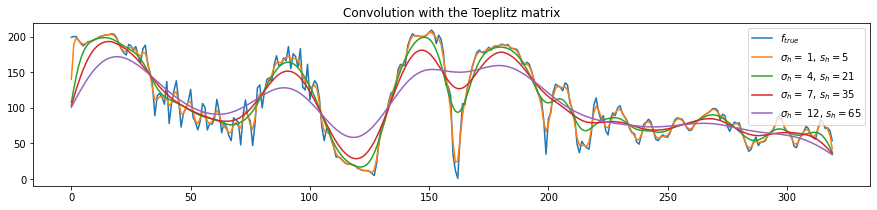

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (15, 3))  # Create a figure and an axes.
ax.set_title('Convolution with the Toeplitz matrix')

def get_g_toe(i):
    f_true_new = np.pad(f_true, list_params[i][1]-1) 
    g_toe = list_A_psf[i]@f_true_new
    idx_begin = list_params[i][1]+int(list_params[i][1]/2)-1
    idx_end = -list_params[i][1]+int(list_params[i][1]/2)+1
    return g_toe[idx_begin: idx_end]

list_g_toe = [get_g_toe(i) for i in range(len(list_A_psf))]

ax.plot(f_true, label="$f_{true}$")
for g_toe, (sigma, kernel_size) in zip(list_g_toe, list_params):
    ax.plot(g_toe, label="$\sigma_h =$ {}, $s_h =${}".format(sigma, kernel_size))
ax.legend()

In [10]:
# This cell contains hidden tests.


In [11]:
# This cell contains tests.

for g_cov, g_toe in zip(list_g_cov, list_g_toe):
    np.testing.assert_allclose(g_cov[20:-20], g_toe[20:-20]) # with boundary effects

### Fourier transform
Fourier transform of the Gaussian kernels $\mathcal{F}\{h\}$ (using `numpy.fft.fft()`)
* Pad zeros to both sides of the kernels in `list_h_psf`
* Adjust the kernels as long as `f_true`
* Shift the origin of the kernels to the first element of the array
* Apply the Fourier transform to the shifted padded kernels
* Save the outputs in the variable `list_h_fft` (as `list` of `numpy.array`)

Display the result
* Plot the absolute value of the outputs in `list_h_fft` in the same order of the parameter options in the axes `ax`
* Plot the outputs properly in the frequency domain
* Show the legend in the axes `ax`

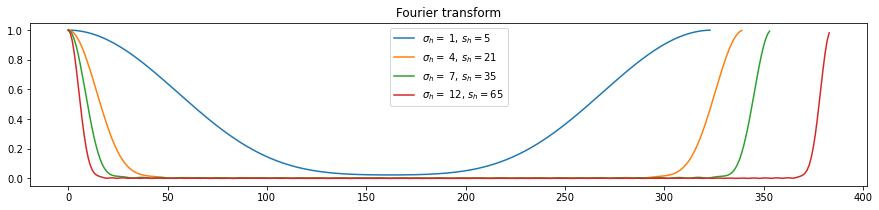

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (15, 3))  # Create a figure and an axes.
ax.set_title('Fourier transform')

def fft_pad_shift(i):
    padded = np.pad(list_h_psf[i], int(f_true.shape[0]/2))
    shifted = np.roll(padded[1:], int(padded.shape[0]/2+1))
    return np.fft.fft(shifted)

list_h_fft = [fft_pad_shift(i) for i in range(len(list_h_psf))]

for fft, (sigma, kernel_size) in zip(list_h_fft, list_params):
    ax.plot(np.abs(fft), label="$\sigma_h =$ {}, $s_h =${}".format(sigma, kernel_size))
ax.legend()

In [13]:
# This cell contains hidden tests.


In [14]:
# This cell contains hidden tests.


### Convolution with the Fourier transform
Convolution with the Fourier transform $g = \mathcal{F}^{-1}\{ \mathcal{F}\{h\} \mathcal{F}\{f_\text{true}\} \}$
* Apply the transformed kernels in `list_h_fft` to `f_true`
* Return the absolute value of the inverse transform
* Save the outputs in the variable `list_g_dft` (as `list` of `numpy.array`)

Display the result
* Plot the outputs in `list_g_dft` in the same order of the parameter options in the axes `ax`
* Plot `f_true` in the axes `ax`
* Show the legend in the axes `ax`

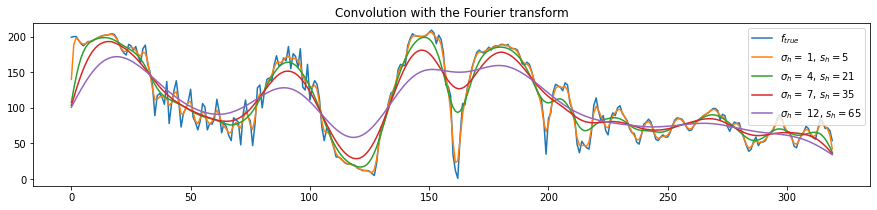

In [15]:
fig, ax = plt.subplots(1, 1, figsize = (15, 3))  # Create a figure and an axes.
ax.set_title('Convolution with the Fourier transform')

def conv_with_fft(i):
    f_true_padded = np.pad(f_true, int(list_params[i][1]/2))
    f_true_fft = np.fft.fft(f_true_padded)
    g_dft = np.fft.ifft(list_h_fft[i]*f_true_fft)
    idx = int(list_params[i][1]/2)
    return np.abs(g_dft)[idx: -idx]

list_g_dft = [conv_with_fft(i) for i in range(len(list_h_fft))]

ax.plot(f_true, label="$f_{true}$")
for g_dft, (sigma, kernel_size) in zip(list_g_dft, list_params):
    ax.plot(g_dft, label="$\sigma_h =$ {}, $s_h =${}".format(sigma, kernel_size))
ax.legend()

In [16]:
# This cell contains hidden tests.


In [17]:
# This cell contains tests.

for g_cov, g_dft in zip(list_g_cov, list_g_dft):
    np.testing.assert_allclose(g_cov[20:-20], g_dft[20:-20]) # with boundary effects